In [50]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df_labeled = pd.read_csv('data/Final_df.csv', na_values=['?'])
df_labeled.head()

,boolean_relationship,chemical_name,disease_name,all_info
0,True,caffeine,ventricular fibrillation,describe yearold woman preexisting mitral valv...
1,False,lactulose,critically ill,laxation critically ill patients lactulose pol...
2,False,sulfasalazine/SSZ,PsA,methotrexate mtx sulfasalazine ssz cyclosporin...
3,True,Polychlorinated biphenyls/PCBs,NAFLD/non-alcoholic fatty liver disease,polychlorinated biphenyls pcbs persistent envi...
4,True,PCP,sarcoma,although pcp classified human carcinogen epide...


In [52]:
labels_true = df_labeled.boolean_relationship
X = df_labeled.all_info

In [54]:
tfidf = TfidfVectorizer(analyzer='word', 
                        stop_words='english', 
                        max_features=7500)

In [55]:
X = tfidf.fit_transform(X).toarray()

In [56]:
X = normalize(X, norm='l2')

In [57]:
db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 10
Homogeneity: 0.024
Completeness: 0.042
V-measure: 0.030
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: 0.038


//anaconda/envs/py3_nlp/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


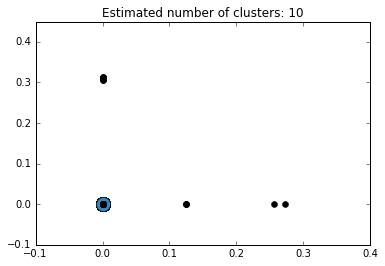

In [58]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlim( (-0.1, 0.4) ) 
plt.ylim((-0.1,0.45))
plt.show()